In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/uber_data.csv')
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1  2016-03-01 00:00:00   2016-03-01 00:07:55                1   
1         1  2016-03-01 00:00:00   2016-03-01 00:11:06                1   
2         2  2016-03-01 00:00:00   2016-03-01 00:31:06                2   
3         2  2016-03-01 00:00:00   2016-03-01 00:00:00                3   
4         2  2016-03-01 00:00:00   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   

   improvement_surcharge  total_amount  
0                    0.3         12.35  
1                    0.3         15.35  
2                    0.3         63.80  
3                    0.3         41.62  
4                    0.3        113.80

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

In [4]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [6]:
df = df.drop_duplicates().reset_index(drop=True)
df['trip_id'] = df.index

In [7]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         1           2016-03-01   2016-03-01 00:07:55                1   
1         1           2016-03-01   2016-03-01 00:11:06                1   
2         2           2016-03-01   2016-03-01 00:31:06                2   
3         2           2016-03-01   2016-03-01 00:00:00                3   
4         2           2016-03-01   2016-03-01 00:00:00                5   

   trip_distance  pickup_longitude  pickup_latitude  RatecodeID  \
0           2.50        -73.976746        40.765152           1   
1           2.90        -73.983482        40.767925           1   
2          19.98        -73.782021        40.644810           1   
3          10.78        -73.863419        40.769814           1   
4          30.43        -73.971741        40.792183           3   

  store_and_fwd_flag  dropoff_longitude  dropoff_latitude  payment_type  \
0                  N         -74.004265         40.746128             1   
1                  N         -74.005943         40.733166             1   
2                  N         -73.974541         40.675770             1   
3                  N         -73.969650         40.757767             1   
4                  N         -74.177170         40.695053             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0          9.0    0.5      0.5        2.05          0.00   
1         11.0    0.5      0.5        3.05          0.00   
2         54.5    0.5      0.5        8.00          0.00   
3         31.5    0.0      0.5        3.78          5.54   
4         98.0    0.0      0.0        0.00         15.50   

   improvement_surcharge  total_amount  trip_id  
0                    0.3         12.35        0  
1                    0.3         15.35        1  
2                    0.3         63.80        2  
3                    0.3         41.62        3  
4                    0.3        113.80        4

In [8]:
datetime_dim = df[['tpep_pickup_datetime','tpep_dropoff_datetime']].reset_index(drop=True)

datetime_dim['tpep_pickup_datetime'] = datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour'] = datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day'] = datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month'] = datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year'] = datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday'] = datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime'] = datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour'] = datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day'] = datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month'] = datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year'] = datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday'] = datetime_dim['tpep_dropoff_datetime'].dt.weekday

datetime_dim['datetime_id'] = datetime_dim.index

datetime_dim = datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday','tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]

datetime_dim.head()

datetime_id tpep_pickup_datetime  pick_hour  pick_day  pick_month  \
0            0           2016-03-01          0         1           3   
1            1           2016-03-01          0         1           3   
2            2           2016-03-01          0         1           3   
3            3           2016-03-01          0         1           3   
4            4           2016-03-01          0         1           3   

   pick_year  pick_weekday tpep_dropoff_datetime  drop_hour  drop_day  \
0       2016             1   2016-03-01 00:07:55          0         1   
1       2016             1   2016-03-01 00:11:06          0         1   
2       2016             1   2016-03-01 00:31:06          0         1   
3       2016             1   2016-03-01 00:00:00          0         1   
4       2016             1   2016-03-01 00:00:00          0         1   

   drop_month  drop_year  drop_weekday  
0           3       2016             1  
1           3       2016             1  
2           3       2016             1  
3           3       2016             1  
4           3       2016             1

In [9]:
passenger_count_dim = df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id'] = passenger_count_dim.index
passenger_count_dim = passenger_count_dim[['passenger_count_id','passenger_count']]

trip_distance_dim = df[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

In [10]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim = df[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id'] = rate_code_dim.index
rate_code_dim['rate_code_name'] = rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

In [11]:
rate_code_dim.head()

rate_code_id  RatecodeID rate_code_name
0             0           1  Standard rate
1             1           1  Standard rate
2             2           1  Standard rate
3             3           1  Standard rate
4             4           3         Newark

In [12]:
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']]


dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [13]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [14]:
fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [15]:
fact_table.columns

Index(['trip_id', 'VendorID', 'datetime_id', 'passenger_count_id',
       'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag',
       'pickup_location_id', 'dropoff_location_id', 'payment_type_id',
       'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
       'improvement_surcharge', 'total_amount'],
      dtype='object')

In [16]:
fact_table

trip_id  VendorID  datetime_id  passenger_count_id  trip_distance_id  \
0            0         1            0                   0                 0   
1            1         1            1                   1                 1   
2            2         2            2                   2                 2   
3            3         2            3                   3                 3   
4            4         2            4                   4                 4   
...        ...       ...          ...                 ...               ...   
99995    99995         1        99995               99995             99995   
99996    99996         1        99996               99996             99996   
99997    99997         1        99997               99997             99997   
99998    99998         2        99998               99998             99998   
99999    99999         1        99999               99999             99999   

       rate_code_id store_and_fwd_flag  pickup_location_id  \
0                 0                  N                   0   
1                 1                  N                   1   
2                 2                  N                   2   
3                 3                  N                   3   
4                 4                  N                   4   
...             ...                ...                 ...   
99995         99995                  N               99995   
99996         99996                  N               99996   
99997         99997                  N               99997   
99998         99998                  N               99998   
99999         99999                  N               99999   

       dropoff_location_id  payment_type_id  fare_amount  extra  mta_tax  \
0                        0                0          9.0    0.5      0.5   
1                        1                1         11.0    0.5      0.5   
2                        2                2         54.5    0.5      0.5   
3                        3                3         31.5    0.0      0.5   
4                        4                4         98.0    0.0      0.0   
...                    ...              ...          ...    ...      ...   
99995                99995            99995          5.0    0.0      0.5   
99996                99996            99996         14.0    0.0      0.5   
99997                99997            99997         29.0    0.0      0.5   
99998                99998            99998          5.5    0.5      0.5   
99999                99999            99999          6.0    0.0      0.5   

       tip_amount  tolls_amount  improvement_surcharge  total_amount  
0            2.05          0.00                    0.3         12.35  
1            3.05          0.00                    0.3         15.35  
2            8.00          0.00                    0.3         63.80  
3            3.78          5.54                    0.3         41.62  
4            0.00         15.50                    0.3        113.80  
...           ...           ...                    ...           ...  
99995        0.00          0.00                    0.3          5.80  
99996        2.00          0.00                    0.3         16.80  
99997        8.80          5.54                    0.3         44.14  
99998        1.36          0.00                    0.3          8.16  
99999        0.00          0.00                    0.3          6.80  

[100000 rows x 17 columns]

merging fact and dimention table for analysing

In [17]:
final = fact_table.merge(passenger_count_dim, on='passenger_count_id') \
             .merge(trip_distance_dim, on='trip_distance_id') \
             .merge(rate_code_dim, on='rate_code_id') \
             .merge(pickup_location_dim, on='pickup_location_id') \
             .merge(dropoff_location_dim, on='dropoff_location_id')\
             .merge(datetime_dim, on='datetime_id') \
             .merge(payment_type_dim, on='payment_type_id')

final.drop(columns= ['VendorID', 'datetime_id', 'passenger_count_id',
       'trip_distance_id', 'rate_code_id','pickup_location_id', 'dropoff_location_id', 'payment_type_id'], inplace = True)

In [18]:
final.columns

Index(['trip_id', 'store_and_fwd_flag', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'passenger_count', 'trip_distance', 'RatecodeID', 'rate_code_name',
       'pickup_latitude', 'pickup_longitude', 'dropoff_latitude',
       'dropoff_longitude', 'tpep_pickup_datetime', 'pick_hour', 'pick_day',
       'pick_month', 'pick_year', 'pick_weekday', 'tpep_dropoff_datetime',
       'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday',
       'payment_type', 'payment_type_name'],
      dtype='object')

In [19]:
final.head()

trip_id store_and_fwd_flag  fare_amount  extra  mta_tax  tip_amount  \
0        0                  N          9.0    0.5      0.5        2.05   
1        1                  N         11.0    0.5      0.5        3.05   
2        2                  N         54.5    0.5      0.5        8.00   
3        3                  N         31.5    0.0      0.5        3.78   
4        4                  N         98.0    0.0      0.0        0.00   

   tolls_amount  improvement_surcharge  total_amount  passenger_count  ...  \
0          0.00                    0.3         12.35                1  ...   
1          0.00                    0.3         15.35                1  ...   
2          0.00                    0.3         63.80                2  ...   
3          5.54                    0.3         41.62                3  ...   
4         15.50                    0.3        113.80                5  ...   

   pick_year  pick_weekday tpep_dropoff_datetime  drop_hour  drop_day  \
0       2016             1   2016-03-01 00:07:55          0         1   
1       2016             1   2016-03-01 00:11:06          0         1   
2       2016             1   2016-03-01 00:31:06          0         1   
3       2016             1   2016-03-01 00:00:00          0         1   
4       2016             1   2016-03-01 00:00:00          0         1   

   drop_month  drop_year drop_weekday  payment_type  payment_type_name  
0           3       2016            1             1        Credit card  
1           3       2016            1             1        Credit card  
2           3       2016            1             1        Credit card  
3           3       2016            1             1        Credit card  
4           3       2016            1             1        Credit card  

[5 rows x 31 columns]

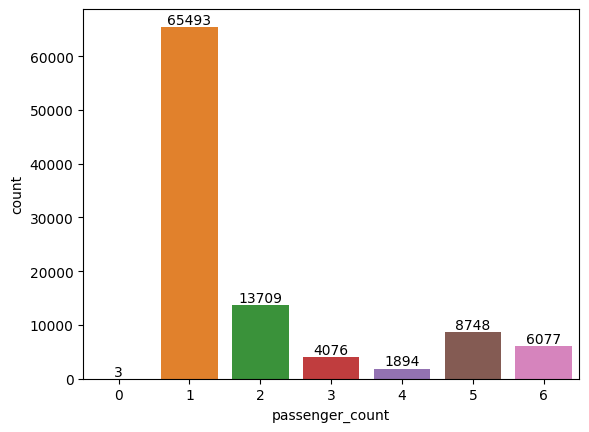

In [20]:
pa_c = sns.countplot(x = 'passenger_count',data = final)

for bars in pa_c.containers:
    pa_c.bar_label(bars)

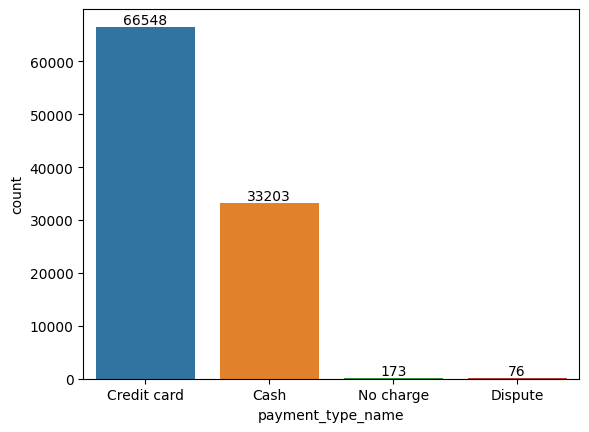

In [21]:
ax = sns.countplot(x = 'payment_type_name',data = final)

for bars in ax.containers:
    ax.bar_label(bars)

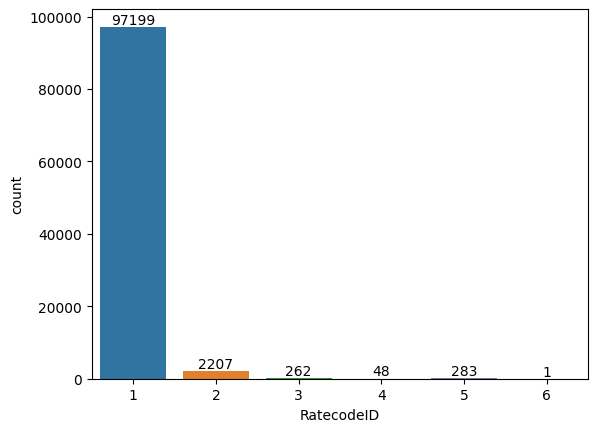

In [22]:
ax = sns.countplot(data = final, x = 'RatecodeID')

for bars in ax.containers:
    ax.bar_label(bars)

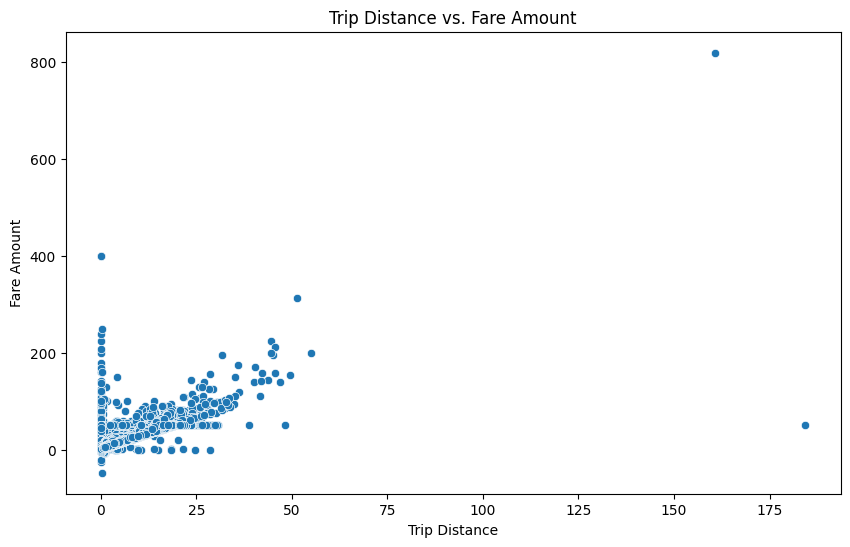

In [23]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='trip_distance', y='fare_amount', data=final)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Trip Distance vs. Fare Amount')
plt.show()

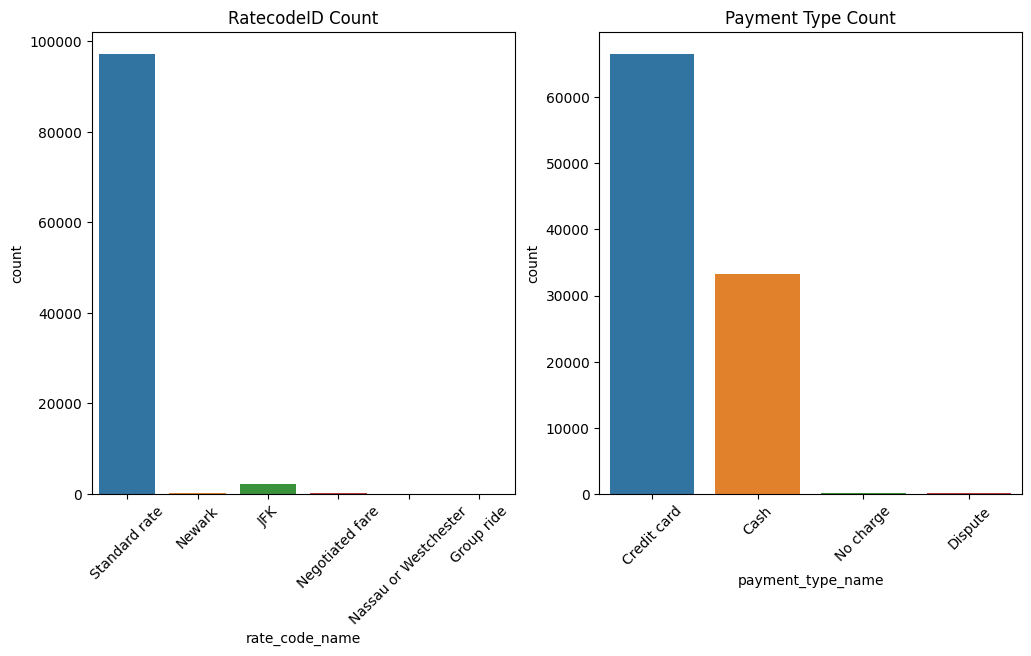

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='rate_code_name', data=final)
plt.xticks(rotation=45)
plt.title('RatecodeID Count')

plt.subplot(1, 2, 2)
sns.countplot(x='payment_type_name', data=final)
plt.xticks(rotation=45)
plt.title('Payment Type Count')
plt.show()


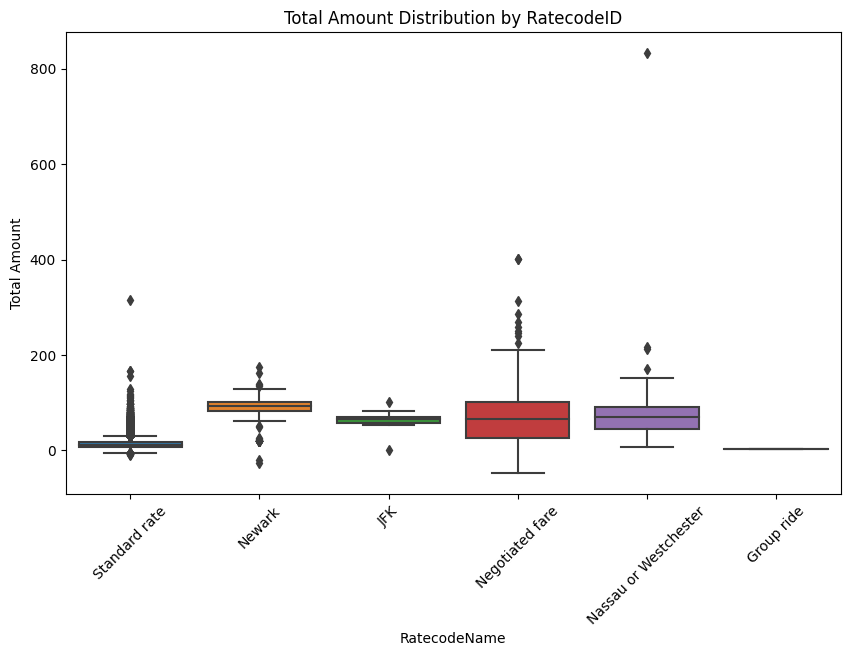

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='rate_code_name', y='total_amount', data=final)
plt.xlabel('RatecodeName')
plt.xticks(rotation=45)
plt.ylabel('Total Amount')
plt.title('Total Amount Distribution by RatecodeID')
plt.show()

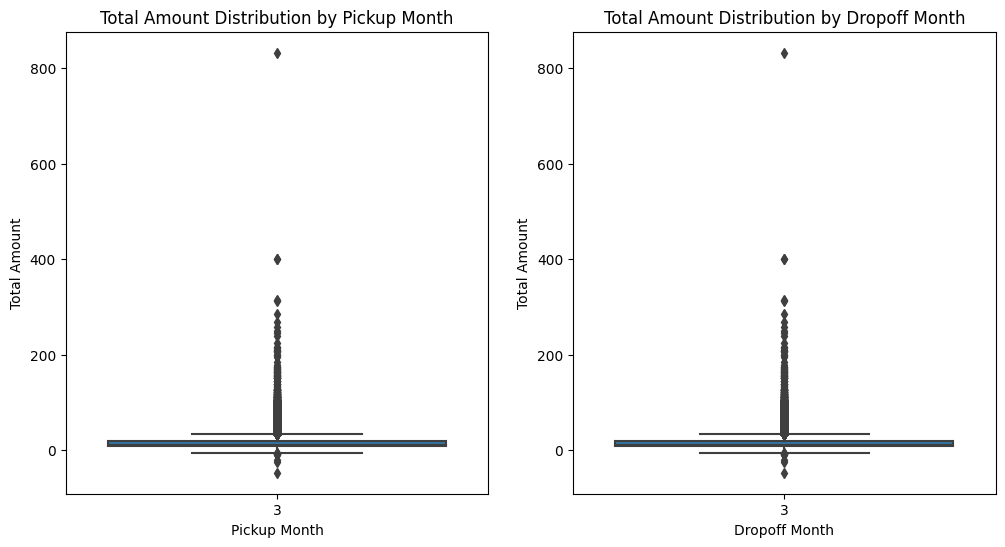

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='pick_month', y='total_amount', data=final)
plt.xlabel('Pickup Month')
plt.ylabel('Total Amount')
plt.title('Total Amount Distribution by Pickup Month')

plt.subplot(1, 2, 2)
sns.boxplot(x='drop_month', y='total_amount', data=final)
plt.xlabel('Dropoff Month')
plt.ylabel('Total Amount')
plt.title('Total Amount Distribution by Dropoff Month')
plt.show()

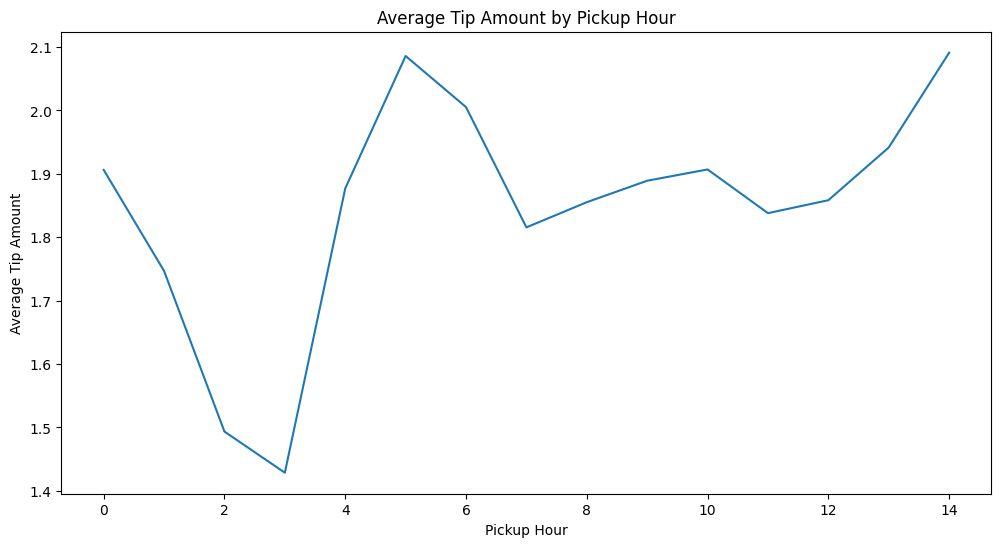

In [27]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='pick_hour', y='tip_amount', data=final.groupby('pick_hour')['tip_amount'].mean().reset_index())
plt.xlabel('Pickup Hour')
plt.ylabel('Average Tip Amount')
plt.title('Average Tip Amount by Pickup Hour')
plt.show()

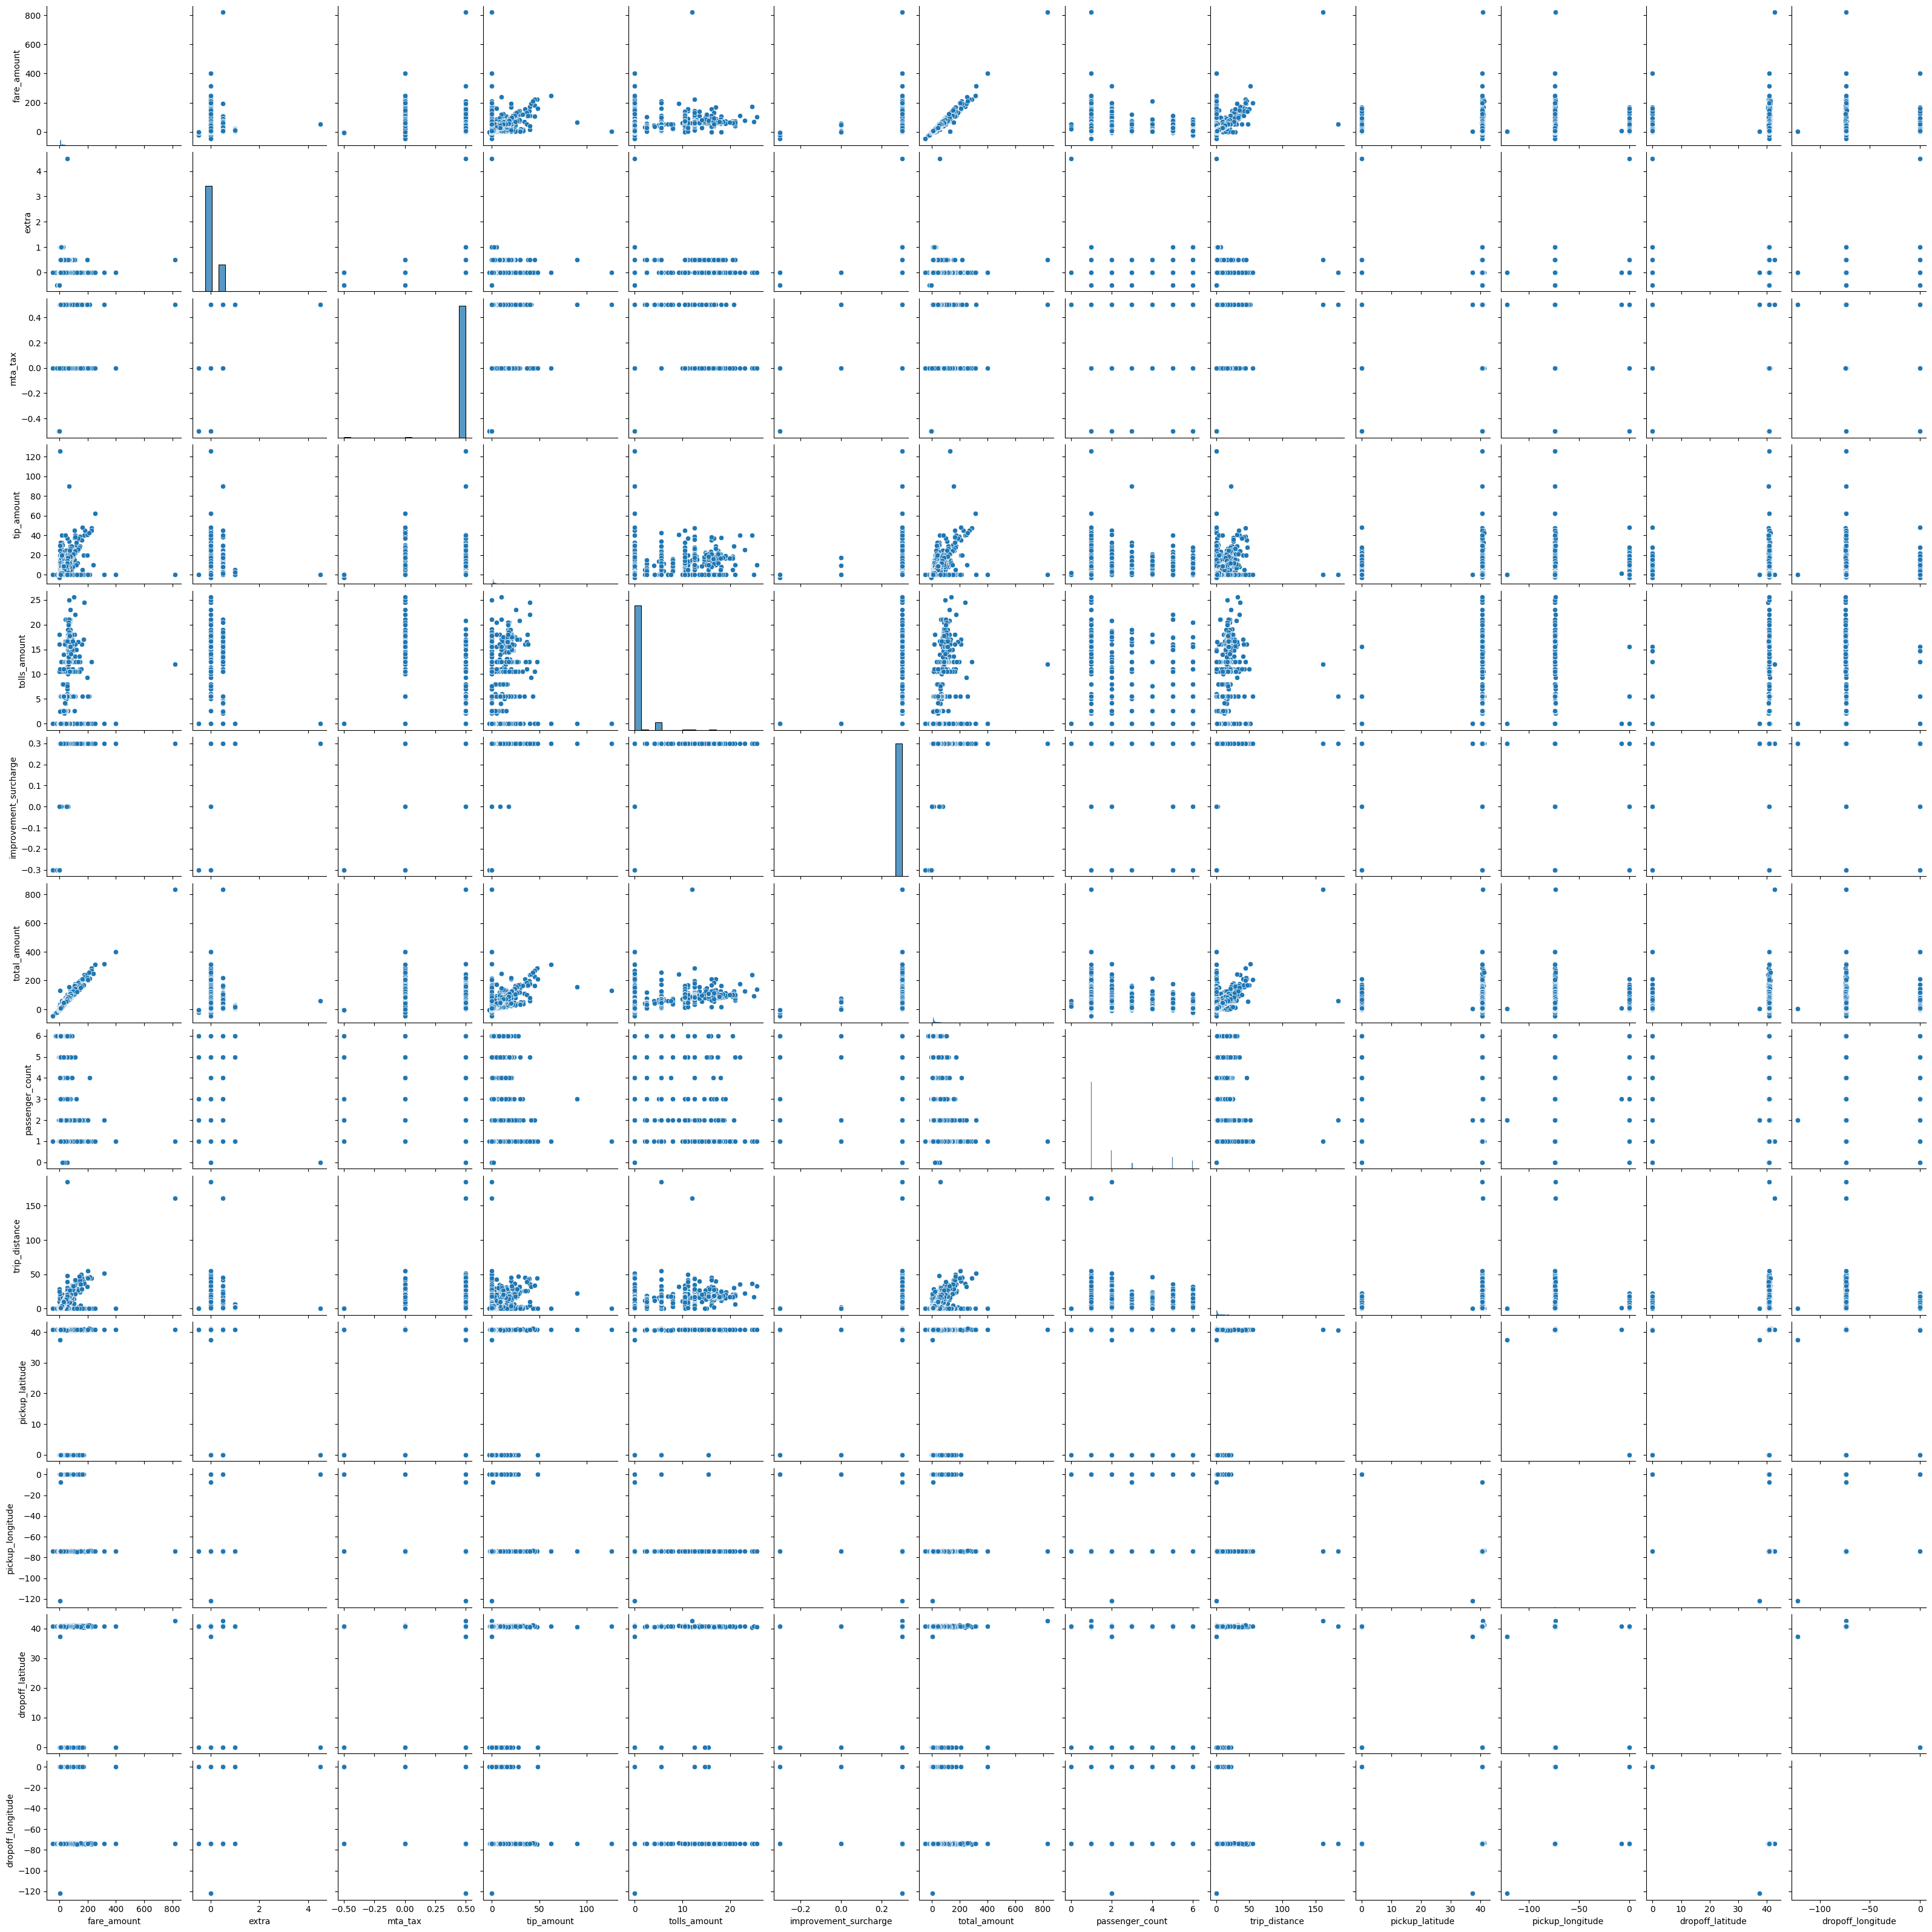

In [28]:
numeric_columns = ['fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
                   'total_amount', 'passenger_count', 'trip_distance', 'pickup_latitude', 'pickup_longitude',
                   'dropoff_latitude', 'dropoff_longitude']

sns.pairplot(final[numeric_columns])
plt.show()

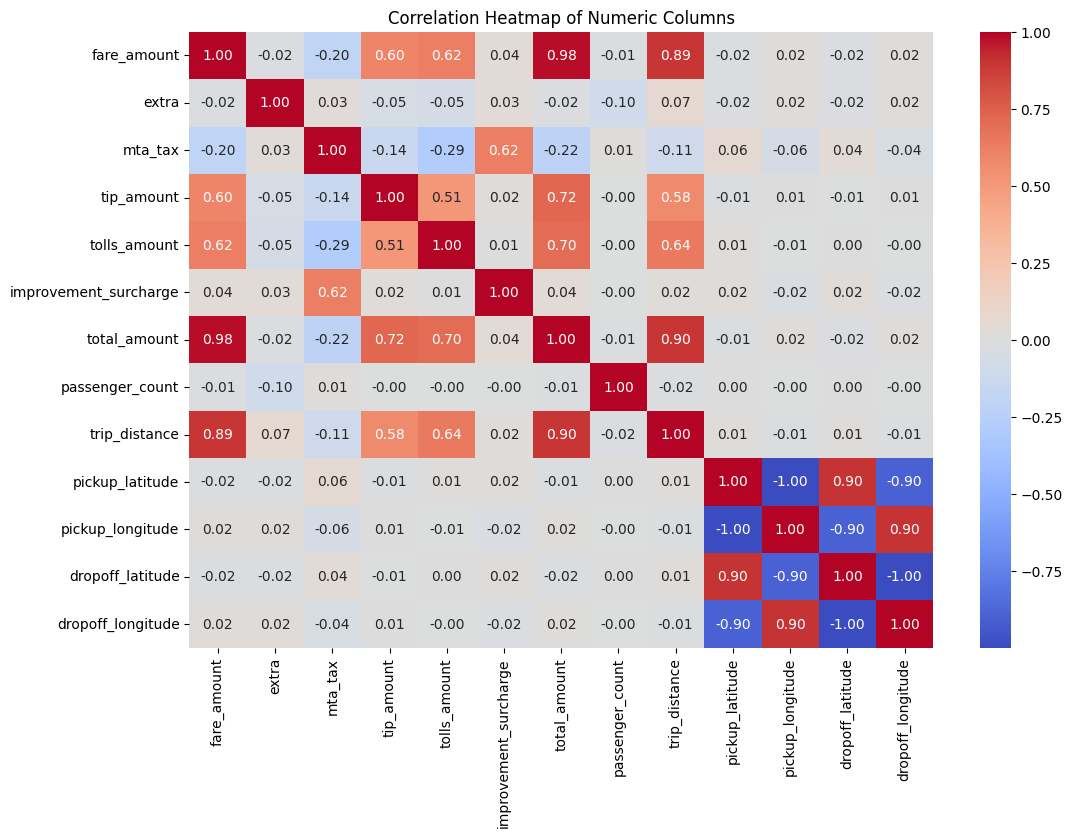

In [29]:
correlation_matrix = final[numeric_columns].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

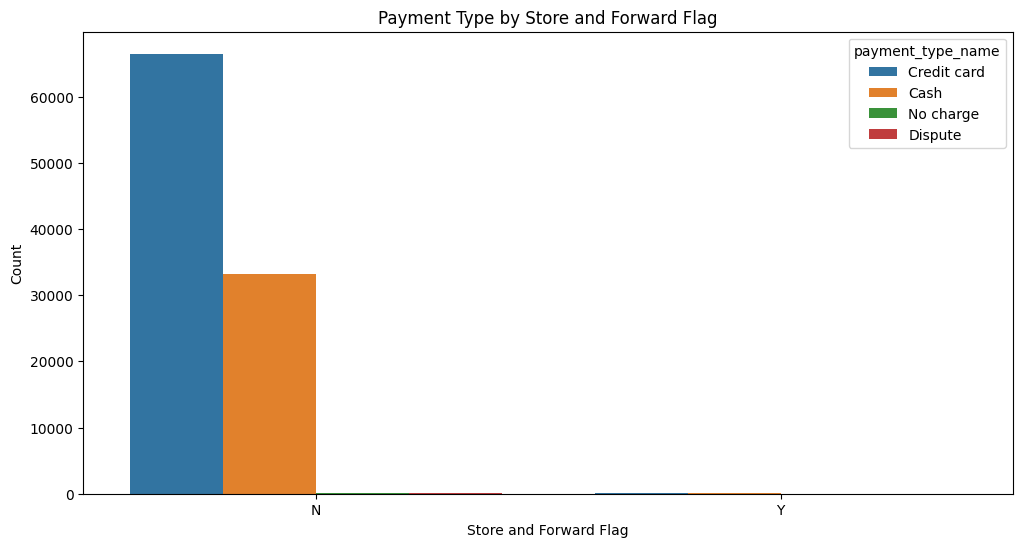

In [30]:
plt.figure(figsize=(12, 6))
sns.countplot(x='store_and_fwd_flag', hue='payment_type_name', data=final)
plt.xlabel('Store and Forward Flag')
plt.ylabel('Count')
plt.title('Payment Type by Store and Forward Flag')
plt.show()

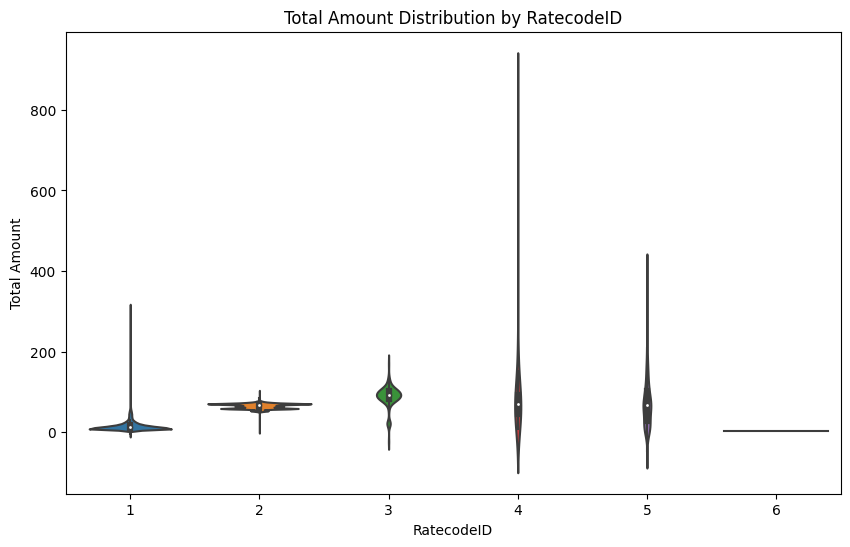

In [31]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='RatecodeID', y='total_amount', data=final)
plt.xlabel('RatecodeID')
plt.ylabel('Total Amount')
plt.title('Total Amount Distribution by RatecodeID')
plt.show()

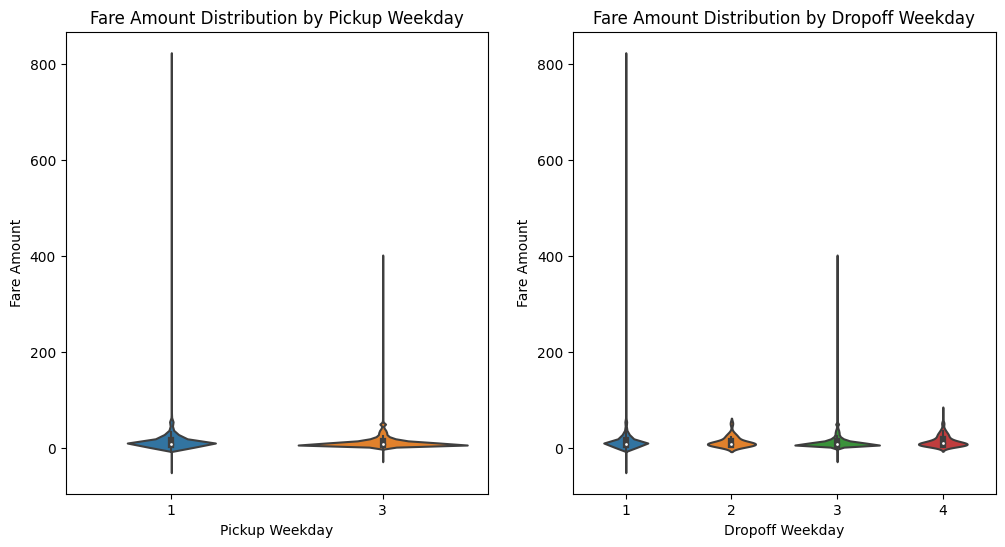

In [32]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.violinplot(x='pick_weekday', y='fare_amount', data=final)
plt.xlabel('Pickup Weekday')
plt.ylabel('Fare Amount')
plt.title('Fare Amount Distribution by Pickup Weekday')

plt.subplot(1, 2, 2)
sns.violinplot(x='drop_weekday', y='fare_amount', data=final)
plt.xlabel('Dropoff Weekday')
plt.ylabel('Fare Amount')
plt.title('Fare Amount Distribution by Dropoff Weekday')
plt.show()

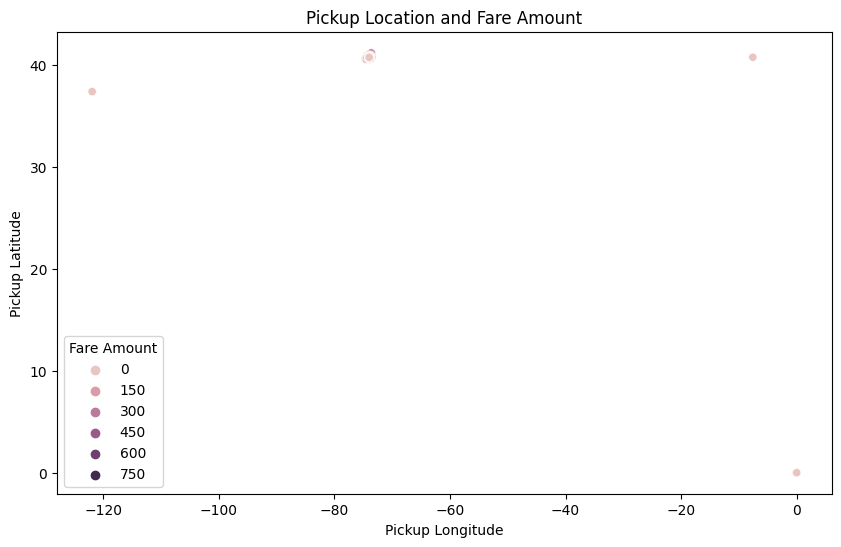

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', hue='fare_amount', data=final)
plt.xlabel('Pickup Longitude')
plt.ylabel('Pickup Latitude')
plt.title('Pickup Location and Fare Amount')
plt.legend(title='Fare Amount')
plt.show()

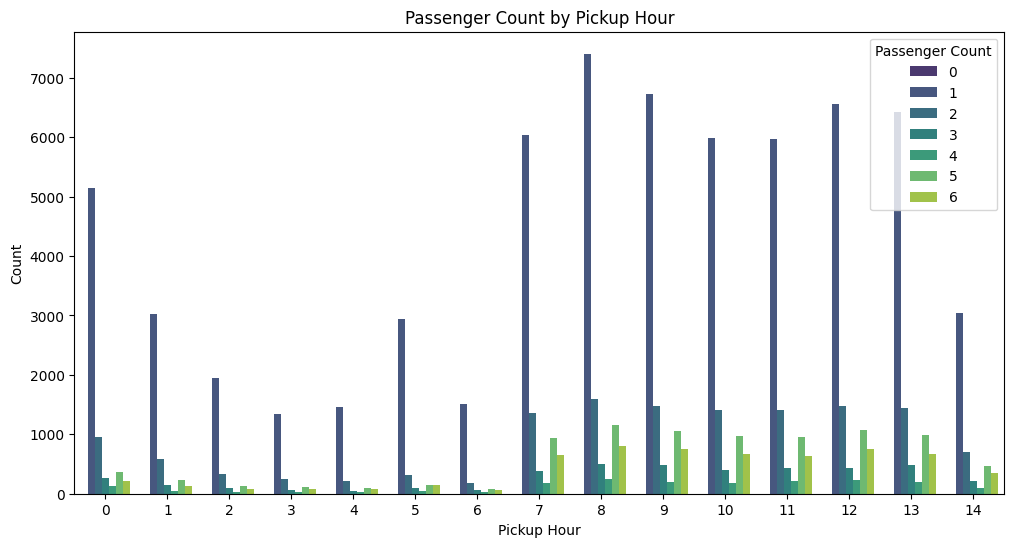

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(x='pick_hour', hue='passenger_count', data=final, palette='viridis', saturation=0.7)
plt.xlabel('Pickup Hour')
plt.ylabel('Count')
plt.title('Passenger Count by Pickup Hour')
plt.legend(title='Passenger Count')
plt.show()

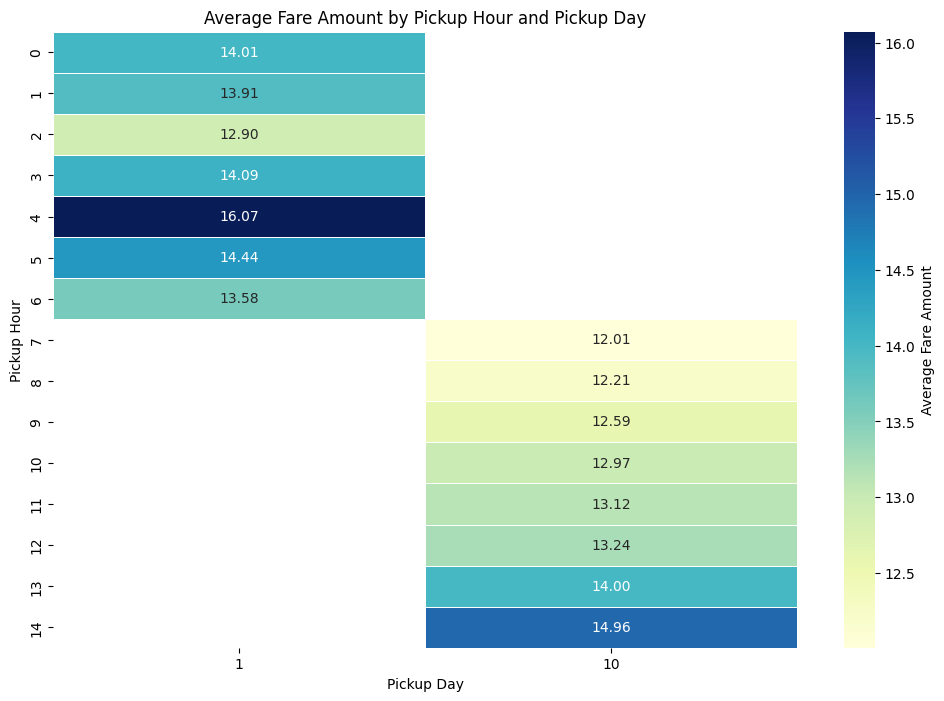

In [37]:
pivot_table = final.pivot_table(index='pick_hour', columns='pick_day', values='fare_amount', aggfunc='mean')
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Average Fare Amount'})
plt.xlabel('Pickup Day')
plt.ylabel('Pickup Hour')
plt.title('Average Fare Amount by Pickup Hour and Pickup Day')
plt.show()


<ipython-input-55-8ce73da362cc>:4: FutureWarning:

Passing `palette` without assigning `hue` is deprecated.



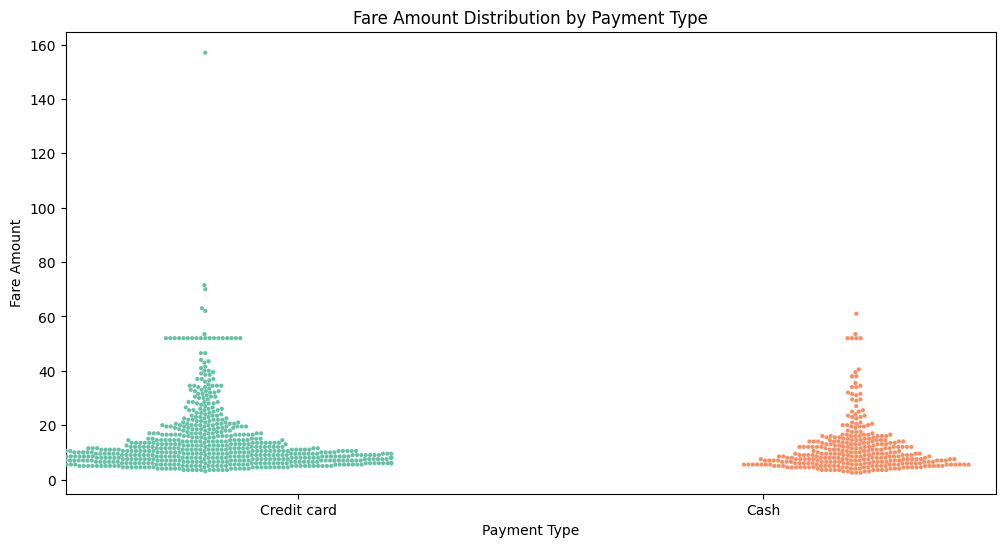

In [55]:
sample_df = final.sample(frac=0.01, random_state=42)

plt.figure(figsize=(12, 6))
sns.swarmplot(x='payment_type_name', y='fare_amount', data=sample_df, palette='Set2', dodge=True, size=3)
plt.xlabel('Payment Type')
plt.ylabel('Fare Amount')
plt.title('Fare Amount Distribution by Payment Type')
plt.show()


<ipython-input-47-bdf30f784fc2>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




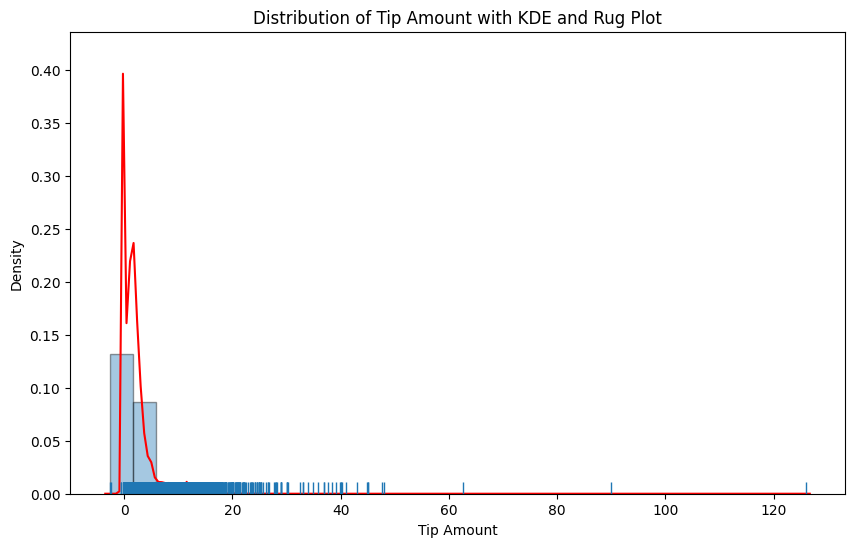

In [47]:
plt.figure(figsize=(10, 6))
sns.distplot(final['tip_amount'], bins=30, kde=True, rug=True, hist_kws={'edgecolor': 'black'}, kde_kws={'color': 'red'})
plt.xlabel('Tip Amount')
plt.ylabel('Density')
plt.title('Distribution of Tip Amount with KDE and Rug Plot')
plt.show()

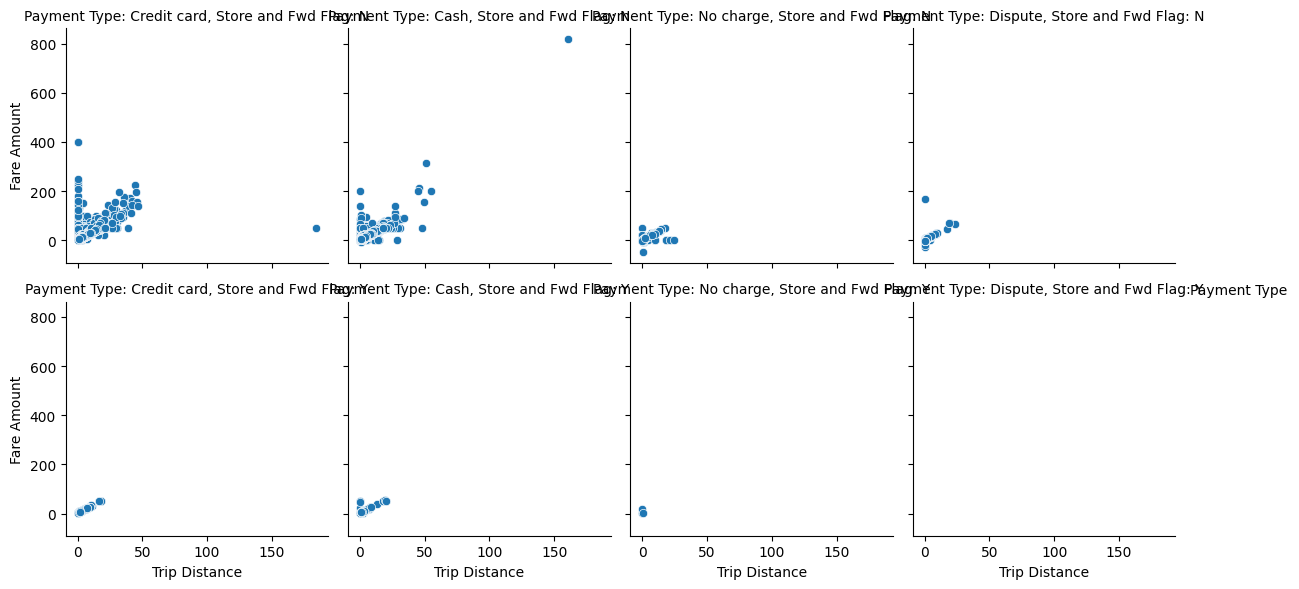

In [43]:
g = sns.FacetGrid(final, col='payment_type_name', row='store_and_fwd_flag')
g.map_dataframe(sns.scatterplot, x='trip_distance', y='fare_amount')
g.set_axis_labels('Trip Distance', 'Fare Amount')
g.set_titles('Payment Type: {col_name}, Store and Fwd Flag: {row_name}')
g.add_legend(title='Payment Type')
plt.show()

In [57]:
fig = px.scatter(final, x='trip_distance', y='fare_amount', color='total_amount',
                 hover_name='trip_id', hover_data=['fare_amount', 'trip_distance'],
                 color_continuous_scale='Viridis', size_max=15)
fig.update_layout(title='Interactive Scatter Plot of Pickup Location',
                  xaxis_title='Pickup Longitude', yaxis_title='Pickup Latitude')
fig.show()


In [61]:
fig = px.scatter_3d(final, x='trip_distance', y='fare_amount', z='total_amount', color='passenger_count',
                     hover_name='trip_id', hover_data=['fare_amount', 'trip_distance'],
                    color_continuous_scale='Viridis', size_max=10)
fig.update_layout(title='3D Scatter Plot of Pickup Location and Fare Amount',
                  scene=dict(xaxis_title='Pickup Longitude', yaxis_title='Pickup Latitude', zaxis_title='Total Amount'))
fig.show()


In [46]:
fig = px.bar(final, x='pick_hour', y='total_amount', animation_frame='pick_month', animation_group='pickup_longitude',
             range_y=[0, 8000], color='passenger_count', facet_row='store_and_fwd_flag',
             labels={'pick_hour': 'Pickup Hour', 'total_amount': 'Total Amount', 'pick_month': 'Pickup Month'})
fig.update_layout(title='Animated Bar Plot of Total Amount by Pickup Hour and Month',
                  xaxis=dict(tickmode='array', tickvals=list(range(0, 24))))
fig.show()
